In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree 
import matplotlib.pyplot as plt 

In [4]:
data=load_breast_cancer()
X=data.data
y=data.target

In [5]:
X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 455
Test size: 114


In [8]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred=dt.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9473684210526315


In [9]:
train_pred=dt.predict(X_train)
train_acc=accuracy_score(y_train, train_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", accuracy)

Train Accuracy: 1.0
Test Accuracy: 0.9473684210526315


In [11]:
dt_pruned=DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)
dt_pruned.fit(X_train, y_train)

y_pred_pruned=dt_pruned.predict(X_test)
print("Test Accuracy (Pruned Tree):", accuracy_score(y_test, y_pred_pruned))

Test Accuracy (Pruned Tree): 0.9473684210526315


In [12]:
cm=confusion_matrix(y_test, y_pred_pruned)
report=classification_report(y_test, y_pred_pruned, target_names=data.target_names)

print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)

Confusion Matrix:
[[39  4]
 [ 2 69]]
Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.91      0.93        43
      benign       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [15]:
import pandas as pd
import numpy as np

feature_importances=pd.DataFrame({
    'feature':data.feature_names,
    'importance':dt_pruned.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importances.head(10)

,feature,importance
7,mean concave points,0.752304
27,worst concave points,0.071432
20,worst radius,0.056905
22,worst perimeter,0.056028
1,mean texture,0.030106
19,fractal dimension error,0.020188
13,area error,0.013038
4,mean smoothness,0.000000
8,mean symmetry,0.000000
6,mean concavity,0.000000


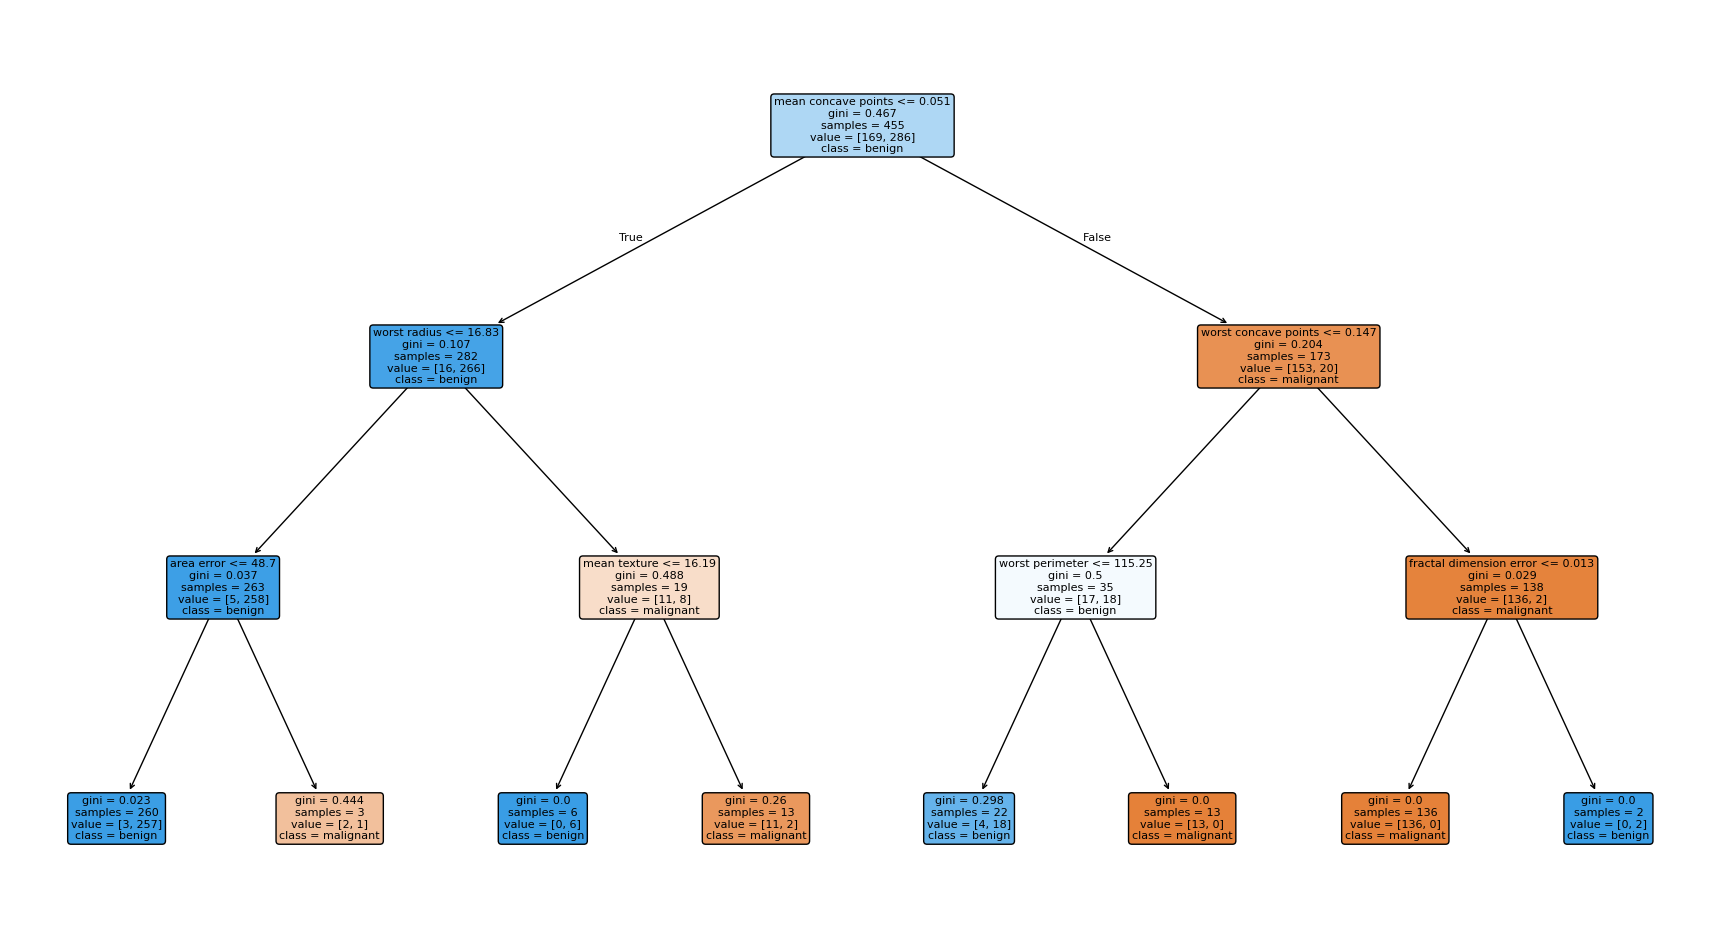

In [16]:
plt.figure(figsize=(22, 12))
tree.plot_tree(
    dt_pruned,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()